# Dfsu - spectral data

MIKE 21 SW can output full spectral information in points, along lines or in an area. In all these cases data are stored in dfsu files with additional axes: frequency and directions. 

This notebook explores reading __full__ spectral dfsu files from MIKE 21 SW as 

* point
* line
* area


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mikeio

## Read dfsu point spectrum

In [2]:
fn = "../tests/testdata/pt_spectra.dfsu"

In [3]:
da = mikeio.read(fn)[0]
da

<mikeio.DataArray>
name: Point 1: Energy density
dims: (time:31, direction:16, frequency:25)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (31 records)
geometry: Point Spectrum Geometry(frequency:25, direction:16)

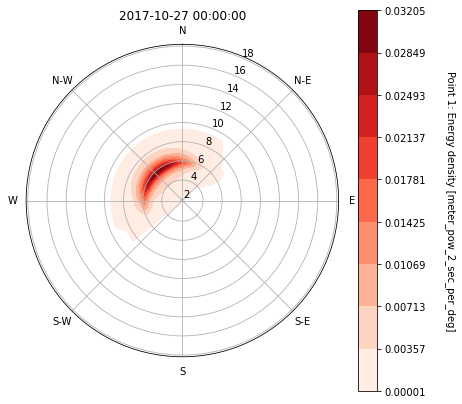

In [4]:
da.plot();

Don't like the default plot? No worries, it can be customized.

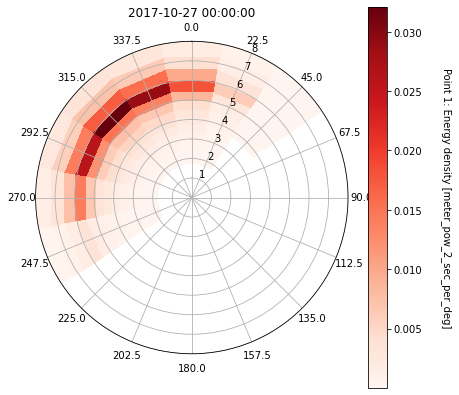

In [5]:
ax = da.plot(rmax=8, plot_type="patch");
dird = np.round(da.directions,2)
ax.set_thetagrids(dird,labels=dird);

## Dfsu line spectrum

Data in dfsu line spectra is node-based contrary to must other dfsu-formats.

In [6]:
fn = "../tests/testdata/line_spectra.dfsu"

In [7]:
da = mikeio.read(fn).Energy_density
da

<mikeio.DataArray>
name: Energy density
dims: (time:4, node:10, direction:16, frequency:25)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (4 records)
geometry: DfsuSpectral1D (9 elements, 10 nodes)

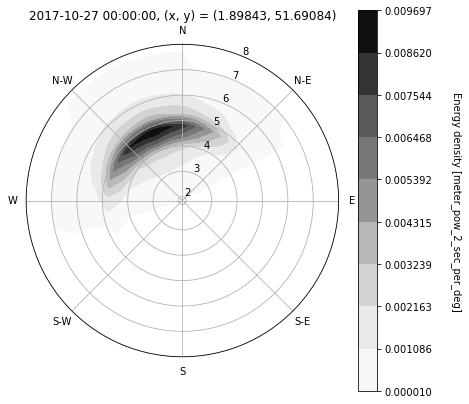

In [8]:
spec = da[0].isel(node=3)  # note first 3 points are outside domain
spec.plot(cmap="Greys", rmax=8, r_as_periods=True);

### Plot Hm0 on a line

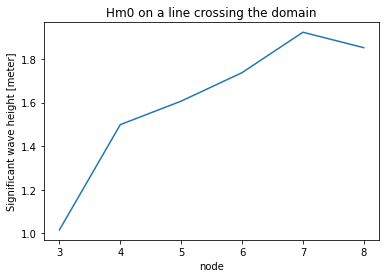

In [9]:
Hm0 = da.isel(time=0).to_Hm0()
Hm0.plot(title='Hm0 on a line crossing the domain');

## Dfsu area spectrum

In [10]:
fn = "../tests/testdata/area_spectra.dfsu"
da = mikeio.read(fn, items="Energy density")[0]
da

<mikeio.DataArray>
name: Energy density
dims: (time:3, element:40, direction:16, frequency:25)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (3 records)
geometry: DfsuSpectral2D (40 elements, 33 nodes)

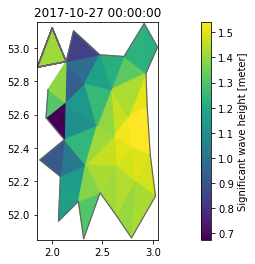

In [11]:
da.plot(); # default area plot is Hm0

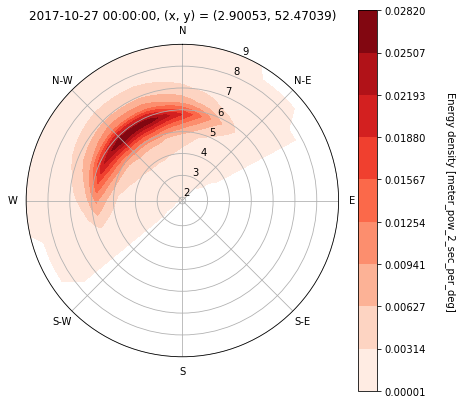

In [12]:
da.sel(x=2.9, y=52.5).plot(rmax=9);

### Interactive widget for exploring spectra in different points 

In [13]:
from ipywidgets import interact
from datetime import timedelta

In [14]:
@interact
def plot_element(id=(0,da.geometry.n_elements-1), step=(0,da.n_timesteps-1)):
    spec = da[step,id]
    time = da.start_time + timedelta(seconds=(step*da.timestep))
    spec.plot(vmax=0.04, vmin=0, rmax=8, title=f"Wave spectrum, {time}, element: {id}");
    plt.show();

interactive(children=(IntSlider(value=19, description='id', max=39), IntSlider(value=1, description='step', ma…